In [128]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import numpy as np
import pickle
import os
import argparse
import sys
print(sys.path)
sys.path.append('/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/')
import torch
from vaemodel import Model
import scipy.io as sio
import pandas as pd
import ntpath
from sklearn.manifold import TSNE
import pandas as pd
RS = 123
from utils import scatter_plot
from sklearn import preprocessing

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
['', '/home/ec2-user/anaconda3/lib/python36.zip', '/home/ec2-user/anaconda3/lib/python3.6', '/home/ec2-user/anaconda3/lib/python3.6/lib-dynload', '/home/ec2-user/.local/lib/python3.6/site-packages', '/home/ec2-user/anaconda3/lib/python3.6/site-packages', '/home/ec2-user/anaconda3/lib/python3.6/site-packages/IPython/extensions', '/home/ec2-user/.ipython', '/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/', '/home/ec2-user/zero-shot-learning/CADA-VAE-PyTorch/data', '/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/', '/home/ec2-user/zero-shot-learning/CADA-VAE-PyTorch/data']


In [290]:
scaler

MinMaxScaler(copy=True, feature_range=(0, 1))

In [129]:
def remove_file_extension(path):
    head, tail = ntpath.split(path)
    base = tail or ntpath.basename(head)
    return os.path.splitext(base)[0]

In [130]:
cls_train_steps = [
      {'dataset': 'SUN',  'num_shots': 0, 'generalized': True, 'cls_train_steps': 21},
      {'dataset': 'SUN',  'num_shots': 0, 'generalized': False, 'cls_train_steps': 30},
      {'dataset': 'SUN',  'num_shots': 1, 'generalized': True, 'cls_train_steps': 22},
      {'dataset': 'SUN',  'num_shots': 1, 'generalized': False, 'cls_train_steps': 96},
      {'dataset': 'SUN',  'num_shots': 5, 'generalized': True, 'cls_train_steps': 29},
      {'dataset': 'SUN',  'num_shots': 5, 'generalized': False, 'cls_train_steps': 78},
      {'dataset': 'SUN',  'num_shots': 2, 'generalized': True, 'cls_train_steps': 29},
      {'dataset': 'SUN',  'num_shots': 2, 'generalized': False, 'cls_train_steps': 61},
      {'dataset': 'SUN',  'num_shots': 10, 'generalized': True, 'cls_train_steps': 79},
      {'dataset': 'SUN',  'num_shots': 10, 'generalized': False, 'cls_train_steps': 94},
      {'dataset': 'AWA1', 'num_shots': 0, 'generalized': True, 'cls_train_steps': 33},
      {'dataset': 'AWA1', 'num_shots': 0, 'generalized': False, 'cls_train_steps': 25},
      {'dataset': 'AWA1', 'num_shots': 1, 'generalized': True, 'cls_train_steps': 40},
      {'dataset': 'AWA1', 'num_shots': 1, 'generalized': False, 'cls_train_steps': 81},
      {'dataset': 'AWA1', 'num_shots': 5, 'generalized': True, 'cls_train_steps': 89},
      {'dataset': 'AWA1', 'num_shots': 5, 'generalized': False, 'cls_train_steps': 62},
      {'dataset': 'AWA1', 'num_shots': 2, 'generalized': True, 'cls_train_steps': 56},
      {'dataset': 'AWA1', 'num_shots': 2, 'generalized': False, 'cls_train_steps': 59},
      {'dataset': 'AWA1', 'num_shots': 10, 'generalized': True, 'cls_train_steps': 100},
      {'dataset': 'AWA1', 'num_shots': 10, 'generalized': False, 'cls_train_steps': 50},
      {'dataset': 'CUB',  'num_shots': 0, 'generalized': True, 'cls_train_steps': 23},
      {'dataset': 'CUB',  'num_shots': 0, 'generalized': False, 'cls_train_steps': 22},
      {'dataset': 'CUB',  'num_shots': 1, 'generalized': True, 'cls_train_steps': 34},
      {'dataset': 'CUB',  'num_shots': 1, 'generalized': False, 'cls_train_steps': 46},
      {'dataset': 'CUB',  'num_shots': 5, 'generalized': True, 'cls_train_steps': 64},
      {'dataset': 'CUB',  'num_shots': 5, 'generalized': False, 'cls_train_steps': 73},
      {'dataset': 'CUB',  'num_shots': 2, 'generalized': True, 'cls_train_steps': 39},
      {'dataset': 'CUB',  'num_shots': 2, 'generalized': False, 'cls_train_steps': 31},
      {'dataset': 'CUB',  'num_shots': 10, 'generalized': True, 'cls_train_steps': 85},
      {'dataset': 'CUB',  'num_shots': 10, 'generalized': False, 'cls_train_steps': 67},
      {'dataset': 'AWA2', 'num_shots': 0, 'generalized': True, 'cls_train_steps': 29},
      {'dataset': 'AWA2', 'num_shots': 0, 'generalized': False, 'cls_train_steps': 39},
      {'dataset': 'AWA2', 'num_shots': 1, 'generalized': True, 'cls_train_steps': 44},
      {'dataset': 'AWA2', 'num_shots': 1, 'generalized': False, 'cls_train_steps': 96},
      {'dataset': 'AWA2', 'num_shots': 5, 'generalized': True, 'cls_train_steps': 99},
      {'dataset': 'AWA2', 'num_shots': 5, 'generalized': False, 'cls_train_steps': 100},
      {'dataset': 'AWA2', 'num_shots': 2, 'generalized': True, 'cls_train_steps': 69},
      {'dataset': 'AWA2', 'num_shots': 2, 'generalized': False, 'cls_train_steps': 79},
      {'dataset': 'AWA2', 'num_shots': 10, 'generalized': True, 'cls_train_steps': 86},
      {'dataset': 'AWA2', 'num_shots': 10, 'generalized': False, 'cls_train_steps': 78}
      ]

In [131]:
hyperparameters = {
    'num_shots': 0,
    'device': 'cuda',
    'model_specifics': {'cross_reconstruction': True,
                       'name': 'CADA',
                       'distance': 'wasserstein',
                       'warmup': {'beta': {'factor': 0.25,
                                           'end_epoch': 93,
                                           'start_epoch': 0},
                                  'cross_reconstruction': {'factor': 2.37,
                                                           'end_epoch': 75,
                                                           'start_epoch': 21},
                                  'distance': {'factor': 8.13,
                                               'end_epoch': 22,
                                               'start_epoch': 6}}},

    'lr_gen_model': 0.00015,
    'generalized': True,
    'batch_size': 50,
    'xyu_samples_per_class': {'SUN': (200, 0, 400, 0),
                              'APY': (200, 0, 400, 0),
                              'CUB': (200, 0, 400, 0),
                              'AWA2': (200, 0, 400, 0),
                              'FLO': (200, 0, 400, 0),
                              'AWA1': (200, 0, 400, 0)},
    'epochs': 100,
    'loss': 'l1',
    'auxiliary_data_source' : 'attributes',
    'lr_cls': 0.001,
    'dataset': 'CUB',
    'hidden_size_rule': {'resnet_features': (1560, 1660),
                        'attributes': (1450, 665),
                        'sentences': (1450, 665) },
    'latent_size': 64
}

In [132]:
hyperparameters['dataset'] = 'SUN'
hyperparameters['num_shots']= 0
hyperparameters['generalized']= True

hyperparameters['cls_train_steps'] = [x['cls_train_steps']  for x in cls_train_steps
                                        if all([hyperparameters['dataset']==x['dataset'],
                                        hyperparameters['num_shots']==x['num_shots'],
                                        hyperparameters['generalized']==x['generalized'] ])][0]

print('***')
print(hyperparameters['cls_train_steps'] )
if hyperparameters['generalized']:
    if hyperparameters['num_shots']==0:
        hyperparameters['samples_per_class'] = {'CUB': (200, 0, 400, 0), 'SUN': (200, 0, 400, 0),
                                'APY': (200, 0,  400, 0), 'AWA1': (200, 0, 400, 0),
                                'AWA2': (200, 0, 400, 0), 'FLO': (200, 0, 400, 0)}
    else:
        hyperparameters['samples_per_class'] = {'CUB': (200, 0, 200, 200), 'SUN': (200, 0, 200, 200),
                                                    'APY': (200, 0, 200, 200), 'AWA1': (200, 0, 200, 200),
                                                    'AWA2': (200, 0, 200, 200), 'FLO': (200, 0, 200, 200)}
else:
    if hyperparameters['num_shots']==0:
        hyperparameters['samples_per_class'] = {'CUB': (0, 0, 200, 0), 'SUN': (0, 0, 200, 0),
                                                    'APY': (0, 0, 200, 0), 'AWA1': (0, 0, 200, 0),
                                                    'AWA2': (0, 0, 200, 0), 'FLO': (0, 0, 200, 0)}
    else:
        hyperparameters['samples_per_class'] = {'CUB': (0, 0, 200, 200), 'SUN': (0, 0, 200, 200),
                                                    'APY': (0, 0, 200, 200), 'AWA1': (0, 0, 200, 200),
                                                    'AWA2': (0, 0, 200, 200), 'FLO': (0, 0, 200, 200)}

***
21


In [133]:
model = Model(hyperparameters)

The current working directory is
/home/ec2-user/zero-shot-learning/CADA-VAE-PyTorch/model
Project Directory:
/home/ec2-user/zero-shot-learning/CADA-VAE-PyTorch
Data Path
/home/ec2-user/zero-shot-learning/CADA-VAE-PyTorch/data
_____
/home/ec2-user/zero-shot-learning/CADA-VAE-PyTorch/data/SUN/res101.mat
resnet_features 2048
attributes 102


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/torch/nn/functional.py:52: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


In [134]:
saved_state = torch.load('CADA_trained.pth.tar')
model.load_state_dict(saved_state['state_dict'])
for d in ['resnet_features', 'attributes']:
    model.encoder[d].load_state_dict(saved_state['encoder'][d])
    model.decoder[d].load_state_dict(saved_state['decoder'][d])
model.reparameterize_with_noise = True

In [135]:
dataset = model.dataset

In [136]:
dataset.novelclasses

tensor([  3,  10,  23,  24,  32,  38,  53,  57,  72,  74,  75,  85,  95,  99,
        103, 112, 124, 130, 138, 145, 152, 158, 184, 196, 216, 221, 237, 245,
        246, 254, 259, 262, 286, 298, 315, 328, 336, 342, 353, 358, 379, 381,
        420, 423, 425, 440, 448, 471, 482, 493, 508, 509, 517, 529, 558, 560,
        580, 622, 631, 635, 645, 650, 656, 658, 674, 679, 681, 695, 710, 711,
        712, 715], device='cuda:0')

In [137]:
data = sio.loadmat('../data/SUN/att_splits.mat')

In [138]:
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'allclasses_names', 'att', 'original_att', 'test_seen_loc', 'test_unseen_loc', 'train_loc', 'trainval_loc', 'val_loc'])

In [139]:
attributes_names = np.array(data['allclasses_names'])

In [140]:
len(attributes_names)

717

In [197]:
novel_class_names_indices = dataset.novelclasses.cpu().numpy()-1

In [198]:
novel_class_names = attributes_names[novel_class_names_indices]

In [199]:
list(zip(novel_class_names_indices, novel_class_names))

[(2, array([array(['airfield'], dtype='<U8')], dtype=object)),
 (9, array([array(['alcove'], dtype='<U6')], dtype=object)),
 (22,
  array([array(['archaelogical_excavation'], dtype='<U24')], dtype=object)),
 (23, array([array(['archive'], dtype='<U7')], dtype=object)),
 (31, array([array(['art_studio'], dtype='<U10')], dtype=object)),
 (37, array([array(['attic'], dtype='<U5')], dtype=object)),
 (52, array([array(['ball_pit'], dtype='<U8')], dtype=object)),
 (56, array([array(['bank_outdoor'], dtype='<U12')], dtype=object)),
 (71, array([array(['batting_cage_indoor'], dtype='<U19')], dtype=object)),
 (73, array([array(['bayou'], dtype='<U5')], dtype=object)),
 (74, array([array(['bazaar_indoor'], dtype='<U13')], dtype=object)),
 (84, array([array(['berth'], dtype='<U5')], dtype=object)),
 (94, array([array(['boathouse'], dtype='<U9')], dtype=object)),
 (98, array([array(['botanical_garden'], dtype='<U16')], dtype=object)),
 (102, array([array(['boxing_ring'], dtype='<U11')], dtype=obje

In [144]:
attributes = torch.tensor(np.array(data['att']).T)

In [145]:
def convert_datapoints_to_z(model, features, encoder):
    if features.size(0) != 0:
        mu_, logvar_ = encoder(features)
        z = model.reparameterize(mu_, logvar_)
        return z
    else:
        return torch.cuda.FloatTensor([])

In [267]:
semantic_encoder = model.encoder['attributes']

In [268]:
image_encoder = model.encoder['resnet_features']

In [269]:
model.reparameterize_with_noise = True
semantic_latent_space  = convert_datapoints_to_z(model, attributes.float().cuda(), semantic_encoder)

In [270]:
semantic_latent_space.shape

torch.Size([717, 64])

In [271]:
resnet_embeddings = sio.loadmat('../data/SUN/res101.mat')

In [272]:
resnet_embeddings.keys()

dict_keys(['__header__', '__version__', '__globals__', 'image_files', 'features', 'labels'])

In [273]:
image_files = resnet_embeddings['image_files']

In [274]:
image_file_names = [remove_file_extension(p[0][0]) for p in image_files]

In [275]:
image_labels = [p[0] for p in resnet_embeddings['labels']]

In [276]:
label_examples = np.array([559,680, 335])

In [277]:
df = pd.DataFrame(resnet_embeddings['features'].T)

In [278]:
df['files'] = image_file_names

In [279]:
df['labels'] = image_labels

In [280]:
df_novel_examples = df[df.labels.isin(label_examples)]

In [300]:
ejemplos = torch.from_numpy(df_novel_examples.iloc[:,:2048].as_matrix()).float().cuda()

/home/ec2-user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [301]:
model.reparameterize_with_noise = True
image_latent_space = convert_datapoints_to_z(model, ejemplos, image_encoder)

In [302]:
image_latent_space.shape

torch.Size([60, 64])

In [303]:
novel_examples = semantic_latent_space[label_examples]

In [304]:
examples = np.vstack([image_latent_space.cpu().detach().numpy(), novel_examples.cpu().detach().numpy()])

In [305]:
colors = df_novel_examples.labels.values

In [306]:
tsne = TSNE(random_state=RS,n_iter=5000, perplexity=20).fit_transform(examples)

In [307]:
colors = np.hstack([colors,np.array(label_examples * 10)])

(<Figure size 576x576 with 1 Axes>,
 [Text(-28.946327, 65.0908, '335'),
  Text(27.246685, -3.5637717, '559'),
  Text(-11.859649, -36.613655, '680'),
  Text(-23.28632, 10.436558, '3350'),
  Text(-18.713491, 8.546968, '5590'),
  Text(-0.46355832, -13.03489, '6800')])

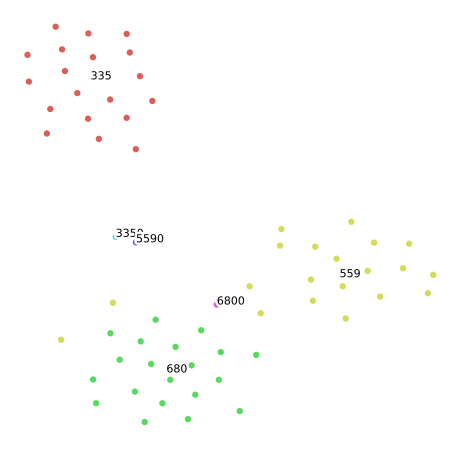

In [308]:
scatter_plot(tsne, colors)